In [2]:
#Data analysis library
import pandas as pd

In [3]:
#read trainset
train = pd.read_csv('sample_train.csv')

#read testset
test = pd.read_csv('sample_test.csv')

# Feature Engineering

Feature Engineering is the process of selecting, manipulating, and transforming raw data into features that can be used in supervised learning.

In [4]:
#separate train row
train_rows = train.shape[0]

#separate test row
test_rows = test.shape[0]

#merge both train & test rows together
all_data = pd.concat((train, test)).reset_index(drop=True)

In [5]:
#all data records(both train & test)
all_data.shape

(150000, 23)

In [6]:
#all data columns
all_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [7]:
#check for missing values
all_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [8]:
#Import datetime library
import datetime

In [9]:
#count the number of times each credit card was used for transaction
all_data['cc_frequency'] =all_data['cc_num'].map(all_data['cc_num'].value_counts())

#convert trans_date_trans_time to datetime datatype
all_data['trans_date_trans_time'] = pd.to_datetime(all_data['trans_date_trans_time'])

#extract hour of transaction from datetime
all_data['hour_of_tranx'] = all_data['trans_date_trans_time'].dt.hour

#convert dob to datetime datatype
all_data['dob'] =  pd.to_datetime(all_data['dob'])

#calculate user age from date of birth column
now = pd.to_datetime('now')
all_data['age'] = now.year - all_data['dob'].dt.year

/var/folders/q7/qyqn80tn5dzbf3t7z1_dhhq00000gn/T/ipykernel_26901/3127937141.py:14: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  now = pd.to_datetime('now')


In [10]:
#print all columns
all_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'cc_frequency', 'hour_of_tranx',
       'age'],
      dtype='object')

In [11]:
#select 2 columns only
all_data[['trans_date_trans_time', 'hour_of_tranx']]

,trans_date_trans_time,hour_of_tranx
0,2019-02-22 01:14:39,1
1,2020-05-31 21:28:12,21
2,2019-01-11 22:16:14,22
3,2019-02-11 14:41:55,14
4,2020-06-12 17:58:38,17
...,...,...
149995,2020-06-21 15:32:44,15
149996,2020-08-13 14:07:07,14
149997,2020-11-29 18:43:34,18
149998,2020-12-22 23:09:44,23


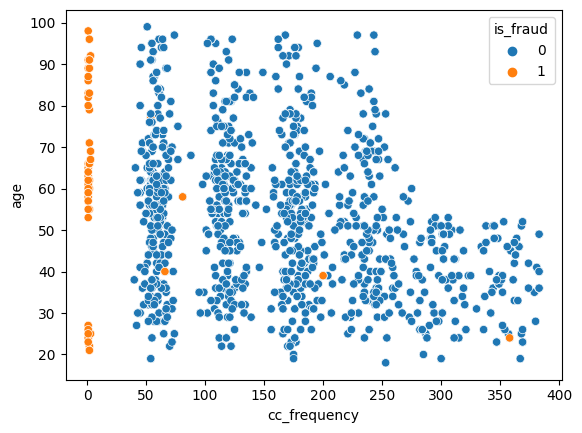

In [12]:
import seaborn as sns
sns.scatterplot(data = all_data, x="cc_frequency", y="age", hue= 'is_fraud');

- drop() - a function use for dropping columns
- axis - “axis = 0” and “axis =1”. “axis = 0” represents rows and “axis= 1” represents columns.
- inplace =True means the operation would work on the original object (overwrite)

In [13]:
#a variable name to_drop stores all columns to drop
to_drop =['Unnamed: 0','cc_num', 'first', 'last', 'gender', 'trans_date_trans_time', 'merchant', 'street', 'city','state', 'zip','city_pop',
          'job','trans_num', 'unix_time' ,'dob']

#drop all columns stored in to_drop variable
all_data =all_data.drop(to_drop, axis=1)

In [14]:
#check data types
all_data.dtypes

category          object
amt              float64
lat              float64
long             float64
merch_lat        float64
merch_long       float64
is_fraud           int64
cc_frequency       int64
hour_of_tranx      int64
age                int64
dtype: object

In [15]:
all_data.head()

,category,amt,lat,long,merch_lat,merch_long,is_fraud,cc_frequency,hour_of_tranx,age
0,grocery_pos,81.07,42.0158,-73.2913,41.452457,-72.918018,0,374,1,36
1,home,27.73,38.1380,-89.2231,38.778411,-88.854934,0,125,21,62
2,kids_pets,190.34,39.9148,-80.7310,39.342257,-81.601052,0,303,22,46
3,kids_pets,134.74,38.8320,-77.1200,39.194023,-76.558310,0,125,14,32
4,shopping_net,7.66,39.9148,-80.7310,40.907353,-80.207589,0,303,17,46


In [16]:
#encode categorical variable to numerical variable
all_data =pd.get_dummies(data = all_data, columns=['category'], drop_first=True)

In [17]:
#extract the train set record back
train = all_data[:train_rows]

#extract the test set record back
test = all_data[train_rows:]

In [18]:
train.head()

,amt,lat,long,merch_lat,merch_long,is_fraud,cc_frequency,hour_of_tranx,age,category_food_dining,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,81.07,42.0158,-73.2913,41.452457,-72.918018,0,374,1,36,0,...,1,0,0,0,0,0,0,0,0,0
1,27.73,38.1380,-89.2231,38.778411,-88.854934,0,125,21,62,0,...,0,0,1,0,0,0,0,0,0,0
2,190.34,39.9148,-80.7310,39.342257,-81.601052,0,303,22,46,0,...,0,0,0,1,0,0,0,0,0,0
3,134.74,38.8320,-77.1200,39.194023,-76.558310,0,125,14,32,0,...,0,0,0,1,0,0,0,0,0,0
4,7.66,39.9148,-80.7310,40.907353,-80.207589,0,303,17,46,0,...,0,0,0,0,0,0,0,1,0,0


In [19]:
test.head()

,amt,lat,long,merch_lat,merch_long,is_fraud,cc_frequency,hour_of_tranx,age,category_food_dining,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
100000,6.20,41.6964,-96.9858,42.416783,-96.439836,0,195,1,95,0,...,0,0,0,0,0,0,0,0,1,0
100001,19.37,42.6853,-73.8253,41.881164,-73.041856,0,128,12,84,0,...,0,0,0,0,0,0,1,0,0,0
100002,58.70,36.1183,-79.5685,35.374583,-79.337287,0,112,3,89,0,...,0,0,0,0,0,0,0,0,0,0
100003,9.45,34.4596,-93.6743,33.887870,-93.040867,0,272,5,57,0,...,0,0,0,0,0,0,0,1,0,0
100004,1.72,41.6964,-96.9858,41.125792,-97.967163,0,195,8,95,0,...,0,0,0,0,0,1,0,0,0,0


In [20]:
train.dtypes

amt                        float64
lat                        float64
long                       float64
merch_lat                  float64
merch_long                 float64
is_fraud                     int64
cc_frequency                 int64
hour_of_tranx                int64
age                          int64
category_food_dining         uint8
category_gas_transport       uint8
category_grocery_net         uint8
category_grocery_pos         uint8
category_health_fitness      uint8
category_home                uint8
category_kids_pets           uint8
category_misc_net            uint8
category_misc_pos            uint8
category_personal_care       uint8
category_shopping_net        uint8
category_shopping_pos        uint8
category_travel              uint8
dtype: object

# NEXT: DAY 4 - Modelling (Build Fraud Detector)